In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [13]:
# Inlezen van CSV-bestand
dataPositions = pd.read_csv('../data-train-sin/positions_xyz_128px_2024-03-05_full.csv')
dataCoordinates = pd.read_csv('../data-train-sin/red_ball_coordinates_128px_2024-03-05_full.csv')
dataPositions.shape, dataCoordinates.shape

((10543, 3), (10543, 14))

In [14]:
combined = pd.concat([dataCoordinates, dataPositions], axis=1)
# remove the rows with to more than 3 NaN values

combined = combined.dropna(thresh=combined.shape[1]-3)
combined

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6,x,y,z
0,47.375000,75.250000,73.500000,53.666667,30.000000,99.714286,29.500000,76.000000,31.500000,54.000000,73.833333,99.166667,75.333333,75.777778,10.13833,3.409981,22.39198
1,47.625000,75.500000,73.500000,54.500000,30.125000,100.125000,29.714286,77.000000,31.400000,54.800000,73.800000,99.600000,75.833333,76.000000,10.13334,3.509852,22.49185
2,47.375000,76.125000,73.400000,54.800000,30.125000,100.875000,30.000000,77.500000,31.500000,55.000000,74.166667,100.166667,75.714286,76.714286,10.12501,3.609500,22.59150
3,46.857143,76.428571,73.500000,55.500000,30.200000,101.400000,29.833333,78.166667,31.666667,55.666667,74.200000,100.600000,75.500000,77.500000,10.11337,3.708816,22.69081
4,47.625000,77.250000,73.500000,55.500000,30.500000,102.000000,30.200000,78.600000,31.333333,56.333333,74.166667,101.166667,75.600000,78.200000,10.09843,3.807688,22.78969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10538,22.000000,105.500000,66.833333,58.666667,38.222222,78.444444,65.000000,79.375000,54.625000,100.875000,25.285714,59.571429,22.500000,81.875000,11.24899,4.288839,22.94084
10539,22.400000,105.800000,67.285714,59.428571,34.333333,77.500000,64.571429,79.285714,57.300000,101.600000,25.363636,59.909091,22.714286,82.000000,11.22574,4.386093,23.03809
10540,22.400000,106.800000,67.500000,59.500000,37.375000,78.875000,65.250000,80.000000,56.555556,101.666667,25.500000,60.000000,23.000000,82.666667,11.19926,4.482517,23.13452
10541,22.833333,107.166667,67.500000,59.875000,37.500000,78.750000,65.500000,80.250000,53.285714,101.142857,25.700000,60.900000,23.000000,83.500000,11.16959,4.578005,23.23001


In [15]:
combined = combined.dropna()
combined.shape

(10365, 17)

In [16]:
X = combined.iloc[:, :14] # select all rows and columns from 0 to 13
y = combined.iloc[:, 14:] # select x y z output columns

### Data Preprocessing

### Splitting the dataset into the Training set and Test set

In [17]:
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

X.shape, y.shape

((10365, 14), (10365, 3))

### Hyperparameter tuning

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

# Define a parameter grid for the MLPRegressor
param_grid = {
    'model__hidden_layer_sizes': [ (50, 50), (150, 100, 50), (200, 150, 100)],
    'model__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'model__solver': ['sgd', 'adam'],
    'model__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'model__learning_rate_init': [0.001, 0.01, 0.1],
    'model__max_iter': [10000, 20000, 28000],
    'model__early_stopping': [True],
}

# Create a pipeline with an MLPRegressor model
pipeline = Pipeline([
    ('model', MLPRegressor(random_state=42))
])

model = MLPRegressor(random_state=42, solver='sgd', max_iter=20000, learning_rate_init=0.1, learning_rate='adaptive', hidden_layer_sizes=(150, 100, 50), early_stopping=True, activation='relu')
# Perform a randomized search over the parameter grid
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

#### Train the model

In [19]:
model.fit(X, y)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(150, 100, 50),
             learning_rate='adaptive', learning_rate_init=0.1, max_iter=20000,
             random_state=42, solver='sgd')

#### Result of the hyperparameter tuning

In [20]:
#model = random_search.best_estimator_

In [21]:
#print('fBest parameters found:\n', random_search.best_params_)

#### Make Predictions

In [22]:
#y_val_pred_scaled = model.predict(X_val_scaled)
#y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled)

#### Evaluate the model

In [23]:
#from utils.evaluate import evaluate_model

#mse_val, mae_val, r2_val = evaluate_model(y_val, y_val_pred, "Validation")

In [24]:
#y_test_pred_scaled = model.predict(X_test_scaled)
#y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

In [25]:
#mse_test, mae_test, r2_test = evaluate_model(y_test, y_test_pred, "Test")

#### Visualize the results
The test data is randomized so the plot won't show a clean trajectory

In [26]:
from utils.plot_maker_gaussian_process import plot_maker_3d

#plot_maker_3d(np.array(y_test)[:10], np.array(y_test_pred)[:10], "Predictions on Test Set")

# Make Predictions on new data

In [27]:
test_data = pd.read_csv('../data-test-sin/red_ball_coordinates_2024-03-05_12h01m.csv', delimiter=',', decimal='.')
test_result = pd.read_csv('../data-test-sin/positions_xyz_2024-03-05_12h01m.csv', delimiter=',', decimal='.')

In [28]:
new_combined = pd.concat([test_data, test_result], axis=1)
new_combined = new_combined.dropna()
new_combined

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6,x,y,z
0,36.0,40.0,125.0,41.0,33.5,84.0,78.0,83.0,126.0,85.0,49.52784,120.747918,69.0,121.0,7.140000,3.070000,15
1,36.0,41.0,124.5,42.0,33.0,85.0,77.5,84.0,126.0,87.0,49.52784,120.747918,69.0,120.5,7.140000,3.070000,15
2,36.0,42.0,124.0,44.0,33.0,86.0,77.5,85.0,126.0,88.0,49.52784,120.747918,69.0,120.5,7.140000,3.070000,15
3,36.0,43.5,124.0,45.0,33.0,87.0,77.0,86.0,125.5,89.0,49.52784,120.747918,69.0,120.0,7.140000,3.070000,15
4,36.0,45.0,123.0,46.0,33.0,89.0,77.0,87.0,126.0,91.0,49.52784,120.747918,69.0,120.0,7.156666,3.169981,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,88.0,6.0,56.0,24.0,83.5,54.0,12.0,72.0,60.5,70.0,74.00000,98.000000,68.5,118.5,2.215740,0.114258,15
1470,88.5,6.0,56.5,24.0,83.5,54.0,11.5,71.0,60.5,70.0,74.00000,98.000000,68.5,118.5,2.218657,0.133010,15
1471,88.0,7.0,56.5,24.0,83.5,54.0,11.0,71.5,60.5,70.0,74.00000,98.000000,68.5,118.5,2.221629,0.155025,15
1472,88.0,7.0,56.5,24.0,83.5,54.5,11.0,71.5,60.5,70.0,74.00000,98.000000,68.5,118.5,2.224656,0.180281,15


In [29]:
new_X = new_combined.iloc[:, :14]
new_y = new_combined.iloc[:, 14:]
new_X.shape, new_y.shape

((1474, 14), (1474, 3))

In [30]:
#new_X_imputed = imputer.fit_transform(new_X)

#new_X_scaled = scaler_X.fit_transform(new_X_imputed)
#new_y_scaled = scaler_y.fit_transform(new_y)

In [31]:
new_y_pred_scaled = model.predict(new_X)

C:\Users\xande\venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [32]:
new_y_pred = scaler_y.inverse_transform(new_y_pred_scaled)

In [33]:
from utils.evaluate import evaluate_model

new_mse, new_mae, new_r2 = evaluate_model(new_y, new_y_pred, "New Data")

Mean Squared Error on New Data Set: 24409.520448207546
Mean Absolute Error on New Data Set: 129.17710974920496
R2 Score on New Data set: -3296.701291571055


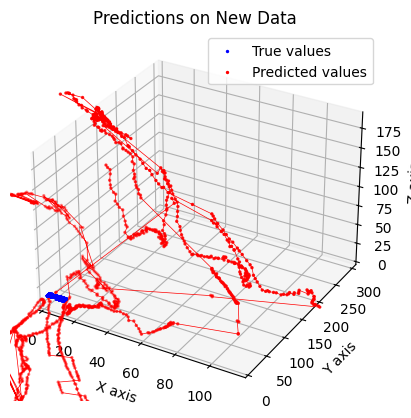

In [34]:
plot_maker_3d(np.array(new_y), np.array(new_y_pred), "Predictions on New Data")